task_464.sage

In [1]:
from IPython.display import display, Math, Latex

mu = var('mu')
assume(mu>0)
epsilon = var('epsilon')
assume(epsilon>0)

s = var ('s')
assume(s>0)

kappa = var ('kappa')
assume(kappa>0)

k = var ('k')

a = var('a')
assume(a>0)

x = var('x')
y = var('y')
z = var('z')

c = var('c')
assume(c>0)
omega = var('omega')


rot E = mu * i * omega / c * H

rot H = - i * omega / c * epsilon * E

Laplasian E + mu * epsilon * omega^2 / c^2 * E - grad div E = 0

уравнение Даламбера

mu * epsilon / c^2 * diff(E, t, 2) - Laplasian E = 0

Ищем решение в виде

E = E(x) * exp(I * k * z) * exp(-I * omega * t)

подставляя в уравнение Даламбера приходим к обыкновенному дифференциальному уравнению

diff (E(x), x, 2) + (mu * epsilon * omega^2 / c^2 - k^2) * E(x) = 0

для диэлектрика

kappa^2 = (mu * epsilon * omega^2 / c^2 - k^2)

diff (E(x), x, 2) + kappa^2 * E(x) = 0

для вакуума с граничными условиями на бесконечности

-s^2 = (mu * epsilon * omega^2 / c^2 - k^2)

diff (E(x), x, 2) - s^2 * E(x) = 0


In [2]:
# исходя из вида дифференциальных уравнений для диэлектрика и вакуума
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = mu * epsilon * omega^2 / c^2 - k^2 == kappa^2
# eq_s     = omega^2 / c^2 - k^2 == - s^2
eq_s     = omega^2 / c^2 + s^2 == k^2

eq_kappa_s = eq_kappa.subs(solve(eq_s, k^2)).full_simplify()
print("eq_kappa_s =")
display(Math(latex(eq_kappa_s)))

eq_s_kappa = eq_s.subs(solve(eq_kappa, k^2)).full_simplify()
print("eq_s_kappa =")
display(Math(latex(eq_s_kappa)))

# решаем полученные обыкновенные дифференциальные уравнения
E = function('E')(x)

de_dielectric = diff (E, x, 2) + kappa^2 * E == 0
E_dielectric = desolve(de_dielectric, E, ivar = x)
de_vacuum  = diff (E, x, 2) - s^2 * E == 0
E_vacuum = desolve(de_vacuum, E, ivar = x)

# получая таким образом выражения для электрического поля в диэлектрике и в вакууме
print("E_dielectric =")
display(Math(latex(E_dielectric)))
# _K2*cos(kappa*x) + _K1*sin(kappa*x)
print("E_vacuum =")
display(Math(latex(E_vacuum)))
# _K1*e^(s*x) + _K2*e^(-s*x)

eq_kappa_s =


<IPython.core.display.Math object>

eq_s_kappa =


<IPython.core.display.Math object>

E_dielectric =


<IPython.core.display.Math object>

E_vacuum =


<IPython.core.display.Math object>

In [3]:
B1_z = var ('B1_z')
B2_z = var ('B2_z')
A1_z = var ('A1_z')
A2_z = var ('A2_z')

B1_x = var ('B1_x')
B2_x = var ('B2_x')
A1_x = var ('A1_x')
A2_x = var ('A2_x')

In [4]:
# выражения для электрического поля в диэлектрике и в вакууме
E_dielectric_z (x) = B1_z*cos(kappa*x) + B2_z*sin(kappa*x)
E_dielectric_x (x) = B1_x*cos(kappa*x) + B2_x*sin(kappa*x)

# x > a
E_vacuum2_z (x) = A2_z*e^(-s*x)
E_vacuum2_x (x) = A2_x*e^(-s*x)

# x < -a
E_vacuum1_z (x) = A1_z*e^(s*x)
E_vacuum1_x (x) = A1_x*e^(s*x)

In [5]:
# выражения для магнитного поля в диэлектрике и в вакууме
# H_y = c / (I * omega * mu) * (diff(E_x, z) - diff(E_z, x))

H_dielectric_y (x) = c / (I * omega * mu) * (I*k*E_dielectric_x (x) - diff(E_dielectric_z (x), x))
H_vacuum1_y (x) = c / (I * omega) * (I*k*E_vacuum1_x (x) - diff(E_vacuum1_z (x), x))
H_vacuum2_y (x) = c / (I * omega) * (I*k*E_vacuum2_x (x) - diff(E_vacuum2_z (x), x))

H_dielectric_y (x) = c / ( omega * mu) * (k*E_dielectric_x (x) + I * diff(E_dielectric_z (x), x))
H_vacuum1_y (x) = c / ( omega) * (k*E_vacuum1_x (x) + I * diff(E_vacuum1_z (x), x))
H_vacuum2_y (x) = c / ( omega) * (k*E_vacuum2_x (x) + I * diff(E_vacuum2_z (x), x))

print ("H_dielectric_y (x) ")
display(Math(latex(H_dielectric_y (x).simplify())))
print ("H_vacuum1_y (x) =")
display(Math(latex(H_vacuum1_y (x))))
print ("H_vacuum2_y (x) =")
display(Math(latex(H_vacuum2_y (x))))

H_dielectric_y (x) 


<IPython.core.display.Math object>

H_vacuum1_y (x) =


<IPython.core.display.Math object>

H_vacuum2_y (x) =


<IPython.core.display.Math object>

In [6]:
# уравнение Максвелла для тока смещения
# rot_H = -I * epsilon * omega / c * E
# rot_H_x = - diff(H_y, z)
# rot_H_z = diff(H_y, x)

rot_H_dielectric_x = - I * k * H_dielectric_y (x)
rot_H_vacuum1_x    = - I * k * H_vacuum1_y (x)
rot_H_vacuum2_x    = - I * k * H_vacuum2_y (x)
rot_H_dielectric_z = diff(H_dielectric_y (x), x)
rot_H_vacuum1_z    = diff(H_vacuum1_y (x), x)
rot_H_vacuum2_z    = diff(H_vacuum2_y (x), x)

print ("rot_H_dielectric_x =")
display(Math(latex(rot_H_dielectric_x)))
print ("rot_H_vacuum1_x =")
display(Math(latex(rot_H_vacuum1_x)))
print ("rot_H_vacuum2_x =")
display(Math(latex(rot_H_vacuum2_x)))
print ("rot_H_dielectric_z =")
display(Math(latex(rot_H_dielectric_z)))
print ("rot_H_vacuum1_z =")
display(Math(latex(rot_H_vacuum1_z)))
print ("rot_H_vacuum2_z =")
display(Math(latex(rot_H_vacuum2_z)))

rot_H_dielectric_x =


<IPython.core.display.Math object>

rot_H_vacuum1_x =


<IPython.core.display.Math object>

rot_H_vacuum2_x =


<IPython.core.display.Math object>

rot_H_dielectric_z =


<IPython.core.display.Math object>

rot_H_vacuum1_z =


<IPython.core.display.Math object>

rot_H_vacuum2_z =


<IPython.core.display.Math object>

In [7]:
eq_rot_H_dielectric_x = rot_H_dielectric_x == -I * epsilon * omega / c * E_dielectric_x (x)
eq_rot_H_dielectric_z = rot_H_dielectric_z == -I * epsilon * omega / c * E_dielectric_z (x)
eq_rot_H_vacuum1_x     = rot_H_vacuum1_x     == -I * omega / c * E_vacuum1_x (x)
eq_rot_H_vacuum2_x     = rot_H_vacuum2_x     == -I * omega / c * E_vacuum2_x (x)
eq_rot_H_vacuum1_z     = rot_H_vacuum1_z     == -I * omega / c * E_vacuum1_z (x)
eq_rot_H_vacuum2_z     = rot_H_vacuum2_z     == -I * omega / c * E_vacuum2_z (x)

print ("eq_rot_H_dielectric_x =")
display(Math(latex(eq_rot_H_dielectric_x.simplify())))
print ("eq_rot_H_dielectric_z =")
display(Math(latex(eq_rot_H_dielectric_z.simplify())))


eq_rot_H_dielectric_x =


<IPython.core.display.Math object>

eq_rot_H_dielectric_z =


<IPython.core.display.Math object>

In [8]:
res = solve( eq_rot_H_dielectric_x.subs(B1_z==0, B2_x==0), B1_x)
display(Math(latex(res)))

<IPython.core.display.Math object>

In [9]:
res = solve( eq_kappa, kappa)
display(Math(latex(res)))

<IPython.core.display.Math object>

In [10]:
res = solve( eq_rot_H_dielectric_z.subs(B1_z==0, B2_x==0), B1_x)
display(Math(latex(res)))

<IPython.core.display.Math object>

In [11]:
# граничные условия на гринице вакуума и диэлектрика
# тангенциальная компонента электрического поля
eqEz_a  = E_dielectric_z (a)  == E_vacuum2_z (a)
eqEz_ma = E_dielectric_z (-a) == E_vacuum1_z (-a)

print ("eqEz_a = ")
display(Math(latex(eqEz_a)))
print ("eqEz_ma = ")
display(Math(latex(eqEz_ma)))


eqEz_a = 


<IPython.core.display.Math object>

eqEz_ma = 


<IPython.core.display.Math object>

In [12]:
# нормальная компонента электрического смещения
eqEx_a  = E_dielectric_x (a) * epsilon  == E_vacuum2_x (a)
eqEx_ma = E_dielectric_x (-a) * epsilon == E_vacuum1_x (-a)

print ("eqEx_a =")
display(Math(latex(eqEx_a)))
print ("eqEx_ma =")
display(Math(latex(eqEx_ma)))


eqEx_a =


<IPython.core.display.Math object>

eqEx_ma =


<IPython.core.display.Math object>

In [13]:
# тангенциальная компонента напряженности магнитного поля
eqHy_a  = H_vacuum2_y (a)  == H_dielectric_y (a)
eqHy_ma = H_vacuum1_y (-a) == H_dielectric_y (-a)

print ("eqHy_a =")
display(Math(latex(eqHy_a)))
print ("eqHy_ma =")
display(Math(latex(eqHy_ma)))

eqHy_a =


<IPython.core.display.Math object>

eqHy_ma =


<IPython.core.display.Math object>

In [14]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

def GenerateMatrixSubs(equsys, vars, vars_subs):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).subs(vars_subs).coefficient(v) for v in vars] for equ in equsys])
    return A

def GenerateMatrixMult(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) * v for v in vars] for equ in equsys])
    return A

def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    for row in M_rows:
        print ("row =", row)

    reduced_list = []
    for r in M_pivot_rows:
        print ("M_rows[", r, "] =")
        display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    reduced_M_det = reduced_M.det()
    print ("")
    print("reduced_M.det() =", reduced_M_det)
    return reduced_M

In [15]:
def rot_H_solve(M_rotH, vars, eq_s_or_kappa, s_or_kappa):
    x = vector(SR, vars)
    y = vector(SR, [0, 0])
    eqns = [(M_rotH*x)[index] == y[index] for index in [0,1]]
    display(Math(latex(eqns)))
    res = []

    for index in [0,1]:
        eq = eqns[index]
        # print(eq)
        sol = solve(eq, vars[0])
        print("sol=")
        display(Math(latex(sol[0])))
        # print(solve(eq, vars[1]))
        print("eq_s_or_kappa =")
        display(Math(latex(eq_s_or_kappa)))
        sol_s_or_kappa_2 = solve(eq_s_or_kappa, s_or_kappa^2)
        print("sol_s_or_kappa_2[0].rhs()=")
        display(Math(latex(sol_s_or_kappa_2[0].rhs())))
        print("")
        s = sol[0].rhs().collect(vars[1])
        ans1 = s.subs(sol_s_or_kappa_2[0].rhs()*c^2==sol_s_or_kappa_2[0].lhs()*c^2)
        ans2 = s.subs(-sol_s_or_kappa_2[0].rhs()*c^2==-sol_s_or_kappa_2[0].lhs()*c^2)

        ans = ans1
        if ans1.number_of_operands() > ans2.number_of_operands():
            ans = ans2
        print("ans =")
        display(Math(latex(ans)))
        if omega in ans.arguments():
            print(ans.arguments())
            sol_omega_2 = solve(eq_s_or_kappa, omega^2)
            print("sol_omega_2 =")
            display(Math(latex(sol_omega_2[0].rhs())))
            som = ans.subs(omega^2 == sol_omega_2[0].rhs())
            print("som =")
            display(Math(latex(som)))
            som = som.full_simplify()
            print("som =")
            display(Math(latex(som)))
            res.append(vars[0] == som)
        else:
            res.append(vars[0] == ans)

        print("")
    return res

In [16]:
eqsys_rotH_dielectric = [eq_rot_H_dielectric_x*(-I)*omega/c,
                         eq_rot_H_dielectric_z*(-I)*omega/c,
                        ]

eqsys_rotH_vacuum = [ # eq_rot_H_vacuum1_x*(-I)*omega/c,
                      eq_rot_H_vacuum2_x*(-I)*omega/c,
                      # eq_rot_H_vacuum1_z*(-I)*omega/c,
                      eq_rot_H_vacuum2_z*(-I)*omega/c,
                    ]

eqsys_boundary_conditions = [eqEx_a,  eqEz_a,  # eqHy_a*(-I)*omega/c,
                             eqEx_ma, eqEz_ma, # eqHy_ma*(-I)*omega/c,
                            ]


In [17]:

# чётные
even_vars = [B1_x, B2_z, A2_x, A2_z]
eqsys_even = [A1_z == - A2_z, A1_x == A2_x]

even_vars_dielectric = [B1_x, B2_z]
even_eqs_dielectric = [B2_x == 0, B1_z == 0]

even_M_rotH_dielectric = GenerateMatrix(eqsys_rotH_dielectric, even_vars_dielectric)
print ("even_M_rotH_dielectric =")
display(Math(latex(even_M_rotH_dielectric)))

even_M_rotH_dielectric =


<IPython.core.display.Math object>

In [18]:
even_res_rotH_dielectric = rot_H_solve(even_M_rotH_dielectric, even_vars_dielectric, eq_kappa, kappa)

<IPython.core.display.Math object>

sol=


<IPython.core.display.Math object>

eq_s_or_kappa =


<IPython.core.display.Math object>

sol_s_or_kappa_2[0].rhs()=


<IPython.core.display.Math object>


ans =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>

eq_s_or_kappa =


<IPython.core.display.Math object>

sol_s_or_kappa_2[0].rhs()=


<IPython.core.display.Math object>


ans =


<IPython.core.display.Math object>

(B2_z, c, epsilon, k, kappa, mu, omega)
sol_omega_2 =


<IPython.core.display.Math object>

som =


<IPython.core.display.Math object>

som =


<IPython.core.display.Math object>

In [19]:
print ("even_res_rotH_dielectric =")
display(Math(latex(even_res_rotH_dielectric)))

even_res_rotH_dielectric =


<IPython.core.display.Math object>

In [20]:
even_vars_vacuum = [A2_x, A2_z]

even_M_rotH_vacuum = GenerateMatrixSubs(eqsys_rotH_vacuum, even_vars_vacuum,  eqsys_even)
print ("even_M_rotH_vacuum =")
display(Math(latex(even_M_rotH_vacuum)))

even_M_rotH_vacuum =


<IPython.core.display.Math object>

In [21]:
even_res_rotH_vacuum = rot_H_solve(even_M_rotH_vacuum, even_vars_vacuum, eq_s, s)

<IPython.core.display.Math object>

sol=


<IPython.core.display.Math object>

eq_s_or_kappa =


<IPython.core.display.Math object>

sol_s_or_kappa_2[0].rhs()=


<IPython.core.display.Math object>


ans =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>

eq_s_or_kappa =


<IPython.core.display.Math object>

sol_s_or_kappa_2[0].rhs()=


<IPython.core.display.Math object>


ans =


<IPython.core.display.Math object>

(A2_z, c, k, omega, s)
sol_omega_2 =


<IPython.core.display.Math object>

som =


<IPython.core.display.Math object>

som =


<IPython.core.display.Math object>

In [22]:
print ("even_res_rotH_vacuum =")
display(Math(latex(even_res_rotH_vacuum)))
# even_res_rotH_vacuum = [_A2_x == I*_A2_z*k/s, _A2_x == I*_A2_z*k/s]

even_res_rotH_vacuum =


<IPython.core.display.Math object>

In [23]:
even_M = GenerateMatrixSubs(eqsys_boundary_conditions + even_res_rotH_dielectric + even_res_rotH_vacuum, even_vars,  eqsys_even)
print ("even_M =")
display(Math(latex(even_M)))

even_M =


<IPython.core.display.Math object>

In [24]:
even_reduced_M = reduceDependedRows(even_M)
even_reduced_M_det = even_reduced_M.det()


M.nrows() 8
M.ncols() 4
M.rank() 4
M.pivot_rows() = (0, 1, 4, 6)
row = (epsilon*cos(a*kappa), 0, -e^(-a*s), 0)
row = (0, sin(a*kappa), 0, -e^(-a*s))
row = (epsilon*cos(a*kappa), 0, -e^(-a*s), 0)
row = (0, -sin(a*kappa), 0, e^(-a*s))
row = (1, -I*k/kappa, 0, 0)
row = (1, -I*k/kappa, 0, 0)
row = (0, 0, 1, -I*k/s)
row = (0, 0, 1, -I*k/s)
M_rows[ 0 ] =


<IPython.core.display.Math object>

M_rows[ 1 ] =


<IPython.core.display.Math object>

M_rows[ 4 ] =


<IPython.core.display.Math object>

M_rows[ 6 ] =


<IPython.core.display.Math object>


reduced_M.det() = I*epsilon*k*cos(a*kappa)*e^(-a*s)/kappa - I*k*e^(-a*s)*sin(a*kappa)/s


In [25]:
even_disp_eq = solve([even_reduced_M_det == 0], s)
print ("even_disp_eq =")
display(Math(latex(even_disp_eq)))

even_disp_eq =


<IPython.core.display.Math object>

In [26]:
even_H_dielectric_y (x) = H_dielectric_y (x).subs(even_res_rotH_dielectric[0]).subs(even_eqs_dielectric).subs(solve(eq_kappa,k^2)).full_simplify()
even_H_vacuum1_y    (x) = H_vacuum1_y    (x).subs(eqsys_even).subs(even_res_rotH_vacuum[0]).subs(solve(eq_s,k^2)).full_simplify()
even_H_vacuum2_y    (x) = H_vacuum2_y    (x).subs(eqsys_even).subs(even_res_rotH_vacuum[0]).subs(solve(eq_s,k^2)).full_simplify()

print ("even_H_dielectric_y (x) ", even_H_dielectric_y (x))
print ("even_H_vacuum1_y (x) =", even_H_vacuum1_y (x))
print ("even_H_vacuum2_y (x) =", even_H_vacuum2_y (x))


even_H_dielectric_y (x)  I*B2_z*epsilon*omega*cos(kappa*x)/(c*kappa)
even_H_vacuum1_y (x) = I*A2_z*omega*e^(s*x)/(c*s)
even_H_vacuum2_y (x) = I*A2_z*omega*e^(-s*x)/(c*s)


In [27]:
even_E_dielectric_z (x) = E_dielectric_z (x).subs(even_res_rotH_dielectric[0]).subs(even_eqs_dielectric).subs(solve(eq_kappa,k^2)).full_simplify()
even_E_dielectric_x (x) = E_dielectric_x (x).subs(even_res_rotH_dielectric[0]).subs(even_eqs_dielectric).subs(solve(eq_kappa,k^2)).full_simplify()

# x > a
even_E_vacuum2_z (x) = E_vacuum2_z (x).subs(eqsys_even).subs(even_res_rotH_vacuum[0]).subs(solve(eq_s,k^2)).full_simplify()
even_E_vacuum2_x (x) = E_vacuum2_x (x).subs(eqsys_even).subs(even_res_rotH_vacuum[0]).subs(solve(eq_s,k^2)).full_simplify()

# x < -a
even_E_vacuum1_z (x) = E_vacuum1_z (x).subs(eqsys_even).subs(even_res_rotH_vacuum[0]).subs(solve(eq_s,k^2)).full_simplify()
even_E_vacuum1_x (x) = E_vacuum1_x (x).subs(eqsys_even).subs(even_res_rotH_vacuum[0]).subs(solve(eq_s,k^2)).full_simplify()


print ("even_E_dielectric_z (x) =", even_E_dielectric_z (x))
print ("even_E_dielectric_x (x) =", even_E_dielectric_x (x))
print ("")

print ("even_E_vacuum2_z (x) =", even_E_vacuum2_z (x))
print ("even_E_vacuum2_x (x) =", even_E_vacuum2_x (x))
print ("")

print ("even_E_vacuum1_z (x) =", even_E_vacuum1_z (x))
print ("even_E_vacuum1_x (x) =", even_E_vacuum1_x (x))
print ("")

even_E_dielectric_z (x) = B2_z*sin(kappa*x)
even_E_dielectric_x (x) = I*B2_z*k*cos(kappa*x)/kappa

even_E_vacuum2_z (x) = A2_z*e^(-s*x)
even_E_vacuum2_x (x) = I*A2_z*k*e^(-s*x)/s

even_E_vacuum1_z (x) = -A2_z*e^(s*x)
even_E_vacuum1_x (x) = I*A2_z*k*e^(s*x)/s



In [28]:
# тангенциальная компонента напряженности магнитного поля
even_eqHy_a  = even_H_vacuum2_y (a)  == even_H_dielectric_y (a)
even_eqHy_ma = even_H_vacuum1_y (-a) == even_H_dielectric_y (-a)

In [29]:
even_A = solve (even_eqHy_a, A2_z)
print ("even_A =")
display(Math(latex(even_A)))
even_A = ((even_A[0].rhs()/e^(a*s)).subs(even_disp_eq).full_simplify())*e^(a*s)
print ("even_A =")
display(Math(latex(even_A)))

even_A =


<IPython.core.display.Math object>

even_A =


<IPython.core.display.Math object>

In [30]:
even_eq_kappa = eq_kappa_s.subs(even_disp_eq).full_simplify()
print("even_eq_kappa =")
display(Math(latex(even_eq_kappa)))

even_eq_kappa =


<IPython.core.display.Math object>

In [31]:
even_sol_kappa = solve(even_eq_kappa, kappa)
print("even_sol_kappa =")
display(Math(latex(even_sol_kappa)))

even_sol_kappa =


<IPython.core.display.Math object>

In [66]:
# eq_kappa_s = eq_kappa.subs(solve(eq_s, k^2)).full_simplify()
eq_s2 = eq_kappa_s.solve(s^2)
eq_kappa2 = eq_kappa_s.solve(kappa^2)

print("eq_s2 =")
display(Math(latex(eq_s2[0].expand())))
print("eq_kappa2 =")
display(Math(latex(eq_kappa2[0].expand())))

eq_kappa2_s2 = (eq_kappa_s.solve(omega^2)[0]/c^2).full_simplify()

print("eq_kappa2_s2 =")
display(Math(latex(eq_kappa2_s2)))

eq_s2 =


<IPython.core.display.Math object>

eq_kappa2 =


<IPython.core.display.Math object>

eq_kappa2_s2 =


<IPython.core.display.Math object>

In [32]:
# sgs
A = 0.1
kappa_A_max = 13*pi.n()/2
s_A_max = 20
digit_values = [omega == 2*pi.n()*10^11, mu == 1, epsilon == 5, c == 299792458 * 100]


In [33]:
even_sol_kappa_d = even_sol_kappa[0].subs(digit_values)
print("even_sol_kappa_d =", even_sol_kappa_d)

even_sol_kappa_d = kappa^2 == 43925.6635603964*cos(a*kappa)^2/(25*cos(a*kappa)^2 + sin(a*kappa)^2)


In [34]:
even_disp_eq_d = even_disp_eq[0].subs(digit_values)
print ("even_disp_eq_d =", even_disp_eq_d)

even_disp_eq_d = s == 1/5*kappa*sin(a*kappa)/cos(a*kappa)


In [35]:
even_disp_eq_da = even_disp_eq_d * a
print ("even_disp_eq_da =", even_disp_eq_da)

even_disp_eq_da = a*s == 1/5*a*kappa*sin(a*kappa)/cos(a*kappa)


In [36]:
print (even_disp_eq_d.rhs().subs(a * kappa == x).subs(kappa == x))

1/5*x*sin(x)/cos(x)


In [37]:
r = omega / c * sqrt(epsilon * mu - 1)
print ("r =", r)

r = r.subs(digit_values)
print ("r =", r)

r = sqrt(epsilon*mu - 1)*omega/c
r = 41.9169004390336


verbose 0 (3791: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 159 points.
verbose 0 (3791: plot.py, generate_plot_points) Last error message: 'Unable to compute f(20.420352248333657)'


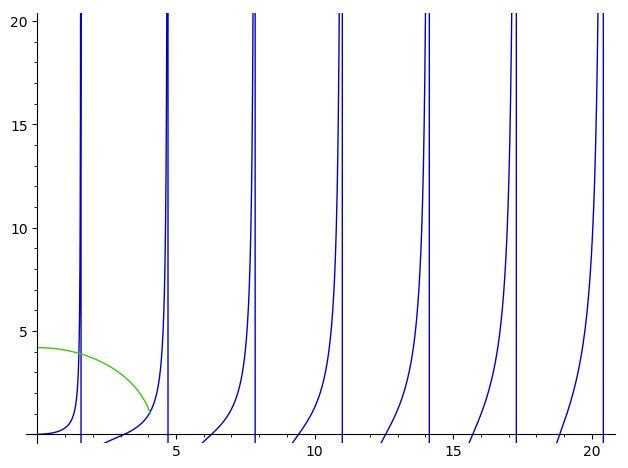

In [38]:
even_disp_eq_fa = lambda x : even_disp_eq_d.rhs().subs(kappa * a == x).subs(kappa == x)
p = plot([even_disp_eq_fa, sqrt((r * A)^2 - x^2)], (x, 0, kappa_A_max), ymin = 0, ymax = s_A_max)
p.show()

verbose 0 (3791: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 159 points.
verbose 0 (3791: plot.py, generate_plot_points) Last error message: 'Unable to compute f(204.20352248333657)'


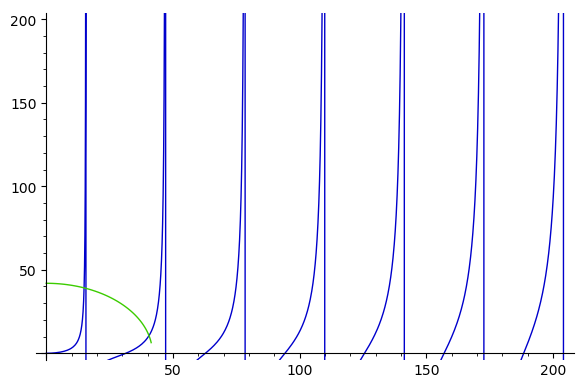

In [39]:
even_disp_eq_f = lambda x : even_disp_eq_d.rhs().subs(kappa == x).subs(a == A)
p = plot([even_disp_eq_f, sqrt((r)^2 - x^2)], (x, 0, kappa_A_max / A), ymin = 0, ymax = s_A_max / A)
p.show()

even_f(x) = 1/5*x*sin(0.100000000000000*x)/cos(0.100000000000000*x) - sqrt(-x^2 + 1757.02654241586)
verbose 0 (3791: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 159 points.
verbose 0 (3791: plot.py, generate_plot_points) Last error message: 'unable to simplify to float approximation'


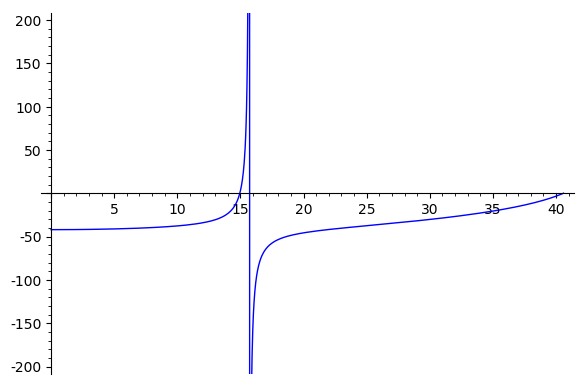

In [40]:
even_f = lambda x : even_disp_eq_f(x) - sqrt((r)^2 - x^2)
print ("even_f(x) =",even_f(x))
p = plot(even_f, (0, kappa_A_max / A), ymin = - s_A_max / A, ymax = s_A_max / A)
p.show()

In [41]:
even_kappa_sol = find_root(even_f(x) == 0, 0, pi/2/A)
print("even_kappa_sol", even_kappa_sol)

even_kappa_sol 14.946136934946512


In [42]:
even_s_sol = even_disp_eq_d.rhs()
print("even_s_sol =", even_s_sol)

even_s_sol = 1/5*kappa*sin(a*kappa)/cos(a*kappa)


In [43]:
even_s_sol = even_s_sol.subs(kappa == even_kappa_sol)
print("even_s_sol =", even_s_sol)

even_s_sol = 2.9892273869893025*sin(14.946136934946512*a)/cos(14.946136934946512*a)


In [44]:
even_s_sol = even_s_sol.subs(a == A)
print("even_s_sol =", even_s_sol)

even_s_sol = 39.1617100384761


In [45]:
even_k_sol = solve(eq_kappa, k)
print("even_k_sol =", even_k_sol)

even_k_sol = [
k == -sqrt(-c^2*kappa^2 + epsilon*mu*omega^2)/c,
k == sqrt(-c^2*kappa^2 + epsilon*mu*omega^2)/c
]


In [46]:
even_k_sol = abs(even_k_sol[0].rhs()).subs(digit_values).subs(kappa == even_kappa_sol)
print("even_k_sol =", even_k_sol)

even_k_sol = 44.4172958287833


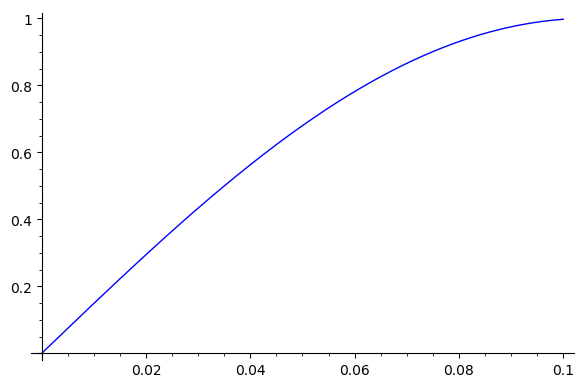

In [47]:
plot(even_E_dielectric_z (x).subs(B2_z == 1, kappa == even_kappa_sol), (x, 0, A))

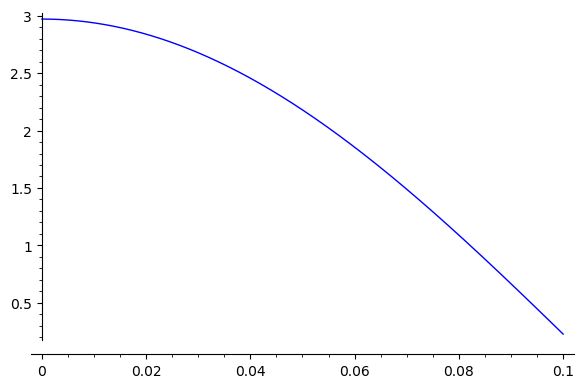

In [48]:
plot(even_E_dielectric_x (x).subs(B2_z == 1, kappa == even_kappa_sol, k = even_k_sol).imag(), (x, 0, A))

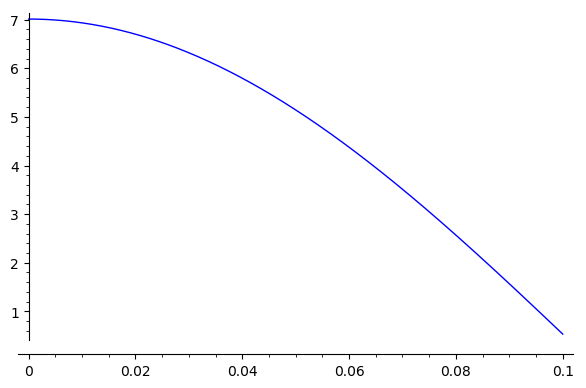

In [49]:
plot(even_H_dielectric_y (x).subs(B2_z == 1, kappa == even_kappa_sol).subs(digit_values).imag(), (x, 0, A))

In [50]:
# Abraham force
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([a x b])_x = a_y * b_z - a_z * b_y
# f_x = (epsilon * mu - 1) / (4 * pi * c) * (-E_z.diff(t) * H_y - E_z * H_y.diff(t))
# E_z.diff(t) = -I * omega * E_z
# H_y.diff(t) = -I * omega * H_y
# f_x = (epsilon * mu - 1) / (4 * pi * c) * (E_z * H_y + E_z * H_y) * I * omega
# f_x = (epsilon * mu - 1) / (2 * pi * c) * (E_z * H_y) * I * omega

f_x(x) = (epsilon * mu - 1) / (2 * pi * c) * (even_E_dielectric_z (x) * even_H_dielectric_y (x)) * I * omega
print("f_x =")
display(Math(latex(f_x(x))))

f_x =


<IPython.core.display.Math object>

In [51]:
f_x(x) = f_x(x).subs(digit_values)
print("f_x =")
display(Math(latex(f_x(x))))

f_x =


<IPython.core.display.Math object>

In [52]:
f_x(x) = f_x(x).subs(_B2_z == 1, kappa == even_kappa_sol)
print("f_x =", f_x(x))
plot(f_x(x), (x, -A, A))

NameError: name '_B2_z' is not defined

In [ ]:
F_x = integrate(f_x(x), (x, 0, A))
print("F_x =", F_x)

In [ ]:
# superconductor force
f_superconductor = - (even_H_dielectric_y (0)^2) / (8* pi)
print("f_superconductor =", f_superconductor)

In [ ]:
f_superconductor = f_superconductor.subs(digit_values).subs(_B2_z == 1, kappa == even_kappa_sol)
print("f_superconductor =", f_superconductor)

In [ ]:
# vacuum field impuls
# 1 / (4 * pi * c) * ([E x H])
# p_x = 1 / (4 * pi * c) * (- E_z * H_y)

p_x(x) = - 1 / (4 * pi * c) * even_E_vacuum2_z (x) * even_H_vacuum2_y (x)
print("p_x =", p_x(x))

In [ ]:
p_x(x) = p_x(x).subs( _A2_z == even_A)
print("p_x =", p_x(x))

p_x(x) = p_x(x).subs( s == even_s_sol).subs(digit_values).subs(_B2_z == 1, kappa == even_kappa_sol, a == A)
print("p_x =", p_x(x))
P_x = integrate(p_x(x), (x, A, infinity))
print("P_x", P_x)